In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from  sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('advertising.csv')

data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Model Comparison:
            Model      MSE       R2
linear Regression 2.907757 0.905901
    Random Forest 1.437433 0.953483
 Gradient Booster 1.255261 0.959378
 Voting Regressor 1.280445 0.958563
Best model based on MSE: Gradient Booster
Best model based on R2 score: Gradient Booster
Predictions saved to predictions.csv


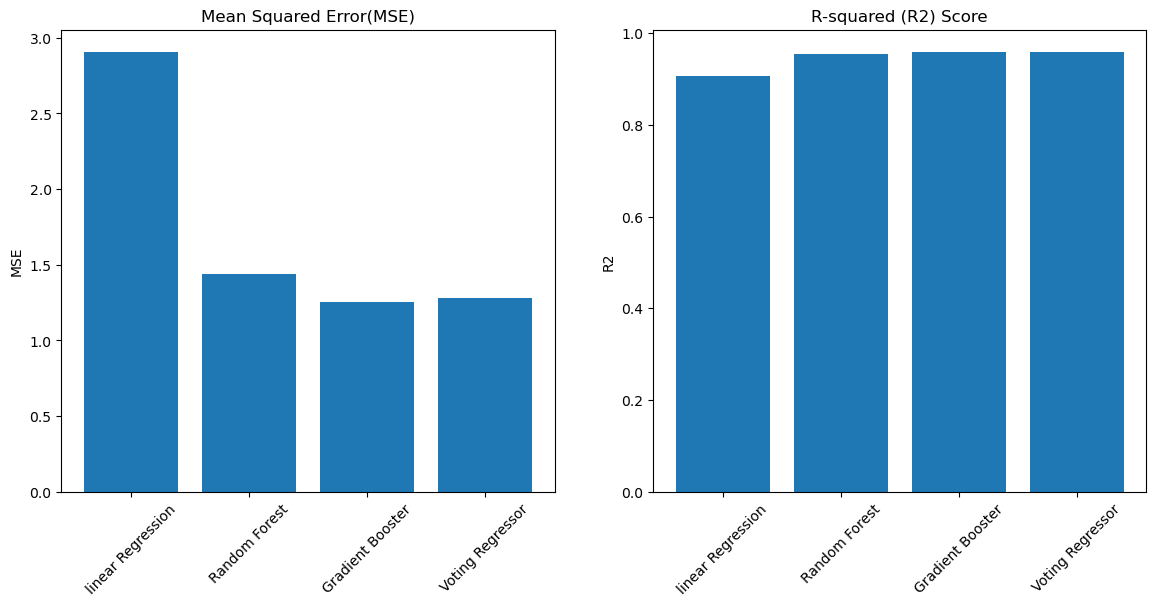

In [4]:
X = data[['TV', 'Radio', 'Newspaper']]
Y = data['Sales']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)

voting_regressor = VotingRegressor([('lr', lr), ('rf', rf), ('gb', gb)])

models = {
    'linear Regression': lr,
    'Random Forest': rf,
    'Gradient Booster': gb,
    'Voting Regressor': voting_regressor
}

result = []
for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)
    result.append({'Model': name, 'MSE':mse, 'R2':r2})
    
results = pd.DataFrame(result)
print("Model Comparison:")
print(results.to_string(index=False))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.bar(results['Model'], results['MSE'])
ax1.set_title('Mean Squared Error(MSE)')
ax1.set_ylabel('MSE')
ax1.tick_params(axis='x', rotation=45)

ax2.bar(results['Model'], results['R2'])
ax2.set_title('R-squared (R2) Score')
ax2.set_ylabel('R2')
ax2.tick_params(axis='x', rotation=45)

best_model_mse = results.loc[results['MSE'].idxmin(), 'Model']
best_model_r2 = results.loc[results['R2'].idxmax(), 'Model']

print(f"Best model based on MSE: {best_model_mse}")
print(f"Best model based on R2 score: {best_model_r2}")

predictions = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
predictions.to_csv('predictions.csv', index=False)
print("Predictions saved to predictions.csv")